<h2>Predicting Heart Attack Risk</h2>
<h3>Notebook 3: Data Processing And Hypothesis Testing</h3>
<p><b>Author: Nikhar Bhavsar</b></p>

<hr>
<p>In this notebook, we will perform Data Processing and Hypothesis Testing, which are important steps in preparing data for our models. Specifically, we will:</p>

<b>Split our Data:</b> 
 <ul> 
      <li>Split dataset into Test and Training set</b></li> 
 </ul> 
 <b>Data Preprocessing:</b> 
 <ul> 
      <li>Encode <b>categorical variables using One-hot or Label encoding</b></li> 
 </ul> 
<b>Hypothesis Testing:</b> 
<ul>  
  <li>Perform <b>statistical comparisons</b> (t-tests, ANOVA)</li> 
  <li>Analyze <b>correlation</b> between variables using Pearson corelation</li> 
  <li>Use <b>Chi-square tests</b> for categorical relationships</li> 
</ul> 


## Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Defining functions](#defining-functions)
3. [Loading Data](#loading-data)
4. [Train-Test Split](#train-test_split)
5. [Data Processing](#data-processing)
6. [Hypothesis Testing](#hypothesis_testing)

## Importing Libraries

In [18]:
import numpy as np  
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Data Preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif 

# Hypothesis Testing
from scipy.stats import shapiro, ks_2samp  
from scipy.stats import ttest_ind, f_oneway 
from scipy.stats import pearsonr, spearmanr  
from scipy.stats import chi2_contingency  

## Defining functions

In [20]:
# Importing the data
def import_csv(file_path):
    """
    Import CSV data into a pandas DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    data = pd.read_csv(file_path)
    return data

def define_df_settings():
    """
    Define the necessary data frame settinfs.
    """
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)

## Importing Libraries

In [22]:
# Importing the data
def import_csv(file_path):
    """
    Import CSV data into a pandas DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: DataFrame containing the CSV data.
    """
    data = pd.read_csv(file_path)
    return data

def define_df_settings():
    """
    Define the necessary data frame settinfs.
    """
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)

## Loading Data

In [24]:
df = import_csv('./../data/heart_attack_cleaned_v2.csv')
define_df_settings()

Let's look at the columns which are present into our dataset.

In [26]:
df.head(10)

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,Yes,No,Former smoker,No,White,65-69,1.60,71.67,27.99,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,Yes,Yes,Former smoker,No,White,70-74,1.78,95.25,30.13,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.85,108.86,31.66,Yes
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.70,90.72,31.32,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.55,79.38,33.07,No
5,Alabama,Male,Good,Yes,7.0,No,No,No,No,No,No,No,Never smoked,Yes,White,50-54,1.85,120.20,34.96,Yes
6,Alabama,Female,Good,Yes,8.0,No,No,Yes,No,No,No,Yes,Never smoked,Yes,Black,80+,1.63,88.00,33.30,No
7,Alabama,Male,Fair,Yes,8.0,Yes,Yes,No,No,No,Yes,Yes,Never smoked,Yes,White,75-79,1.75,74.84,24.37,No
8,Alabama,Male,Good,No,6.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,40-44,1.70,78.02,26.94,No
9,Alabama,Female,Very good,Yes,7.0,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.68,63.50,22.60,No


## Train-Test Split

Let's check the distribution of our Target feature first before we split the data.

Text(0, 0.5, 'Count')

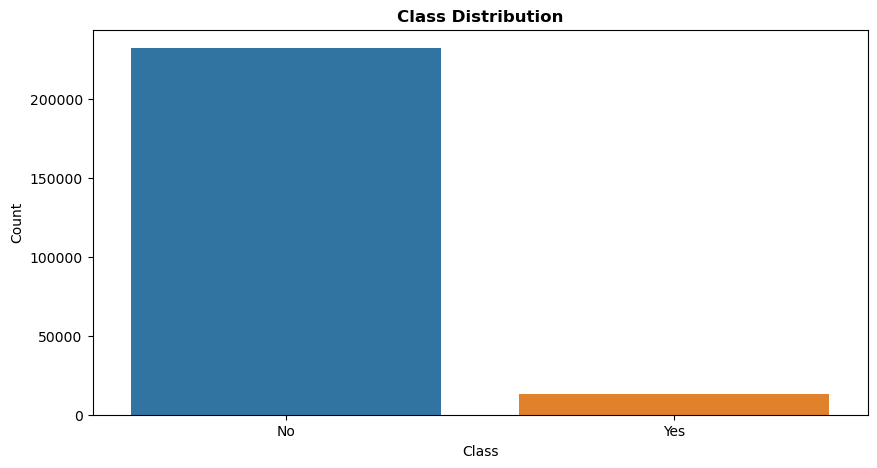

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='HadHeartAttack', data=df)
plt.title('Heart Attack Distribution', fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')

From the distribution we can clearly see that we have the data-imbalance issue in our dataset. During our split we need to handle this case so we don't end up to test our model bias towards majority class.

In [50]:
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# Spliting our data into Test and Train sets to prevent data leckage
# Here stratify will make sure we have equal number of samples of the minority class
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Let's verify if the skLearn has done it's job right

In [52]:
# Verify class distribution
print("Original class distribution:")
print(y.value_counts(normalize=True))

print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Original class distribution:
HadHeartAttack
No     0.945379
Yes    0.054621
Name: proportion, dtype: float64

Train class distribution:
HadHeartAttack
No     0.945381
Yes    0.054619
Name: proportion, dtype: float64

Test class distribution:
HadHeartAttack
No     0.945371
Yes    0.054629
Name: proportion, dtype: float64


As we can see the test and train data both has the equal percentage of positive and negative distribution for HadHeartAttack feature.